Interactive NMR Demo
====================

Purpose
-------

This notebook tests:

- creation of interactive NMR plots
- integration with Binder

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#bokeh + jupyter lab requires "jupyter labextension install jupyterlab_bokeh" installation, 
# but 2018-07-28 there is a dependency conflict

# import bokeh.io
# import bokeh.plotting
# bokeh.io.output_notebook()
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from nmrtools.nmrplot import dnmrplot_AB

In [4]:
args = (
    200,  # v1
    100,  # v2
    10,   # J
    0.1,  # k
    0.5   # W
)


In [5]:

x, y = dnmrplot_AB(*args)
obj = go.Scatter(x=x, y=y)
data = [obj]
# figure = go.Figure(data=data)
iplot(data)

In [6]:
def interactive_ab(v1=200, v2=100, J=10, k=0.1, W=0.5):
    args = (v1, v2, J, k, W)
    x, y = dnmrplot_AB(*args)
    obj = go.Scatter(x=x, y=y)
    data = [obj]
    iplot(data)

In [7]:
interactive_ab()

In [8]:
from ipywidgets import interactive

In [9]:
interactive(interactive_ab, k=(0.1, 1000))

interactive(children=(IntSlider(value=200, description='v1', max=600, min=-200), IntSlider(value=100, descript…

In [10]:
plt.style.use('classic')

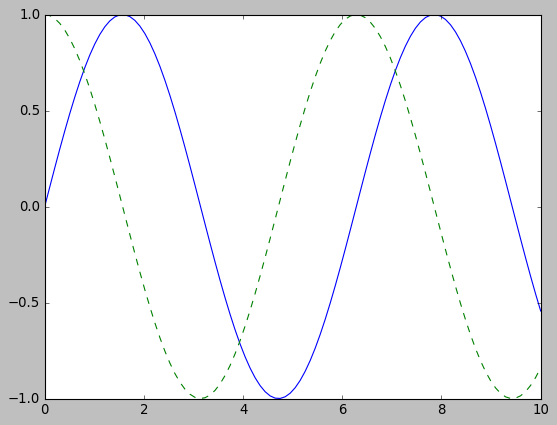

In [11]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [12]:
trace = plotly.graph_objs.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])

fig = dict(data=[trace])

iplot(fig)

In [13]:
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)